# World Data League 2021


## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

For this challenge, we chose to try to solve the problem for public transports. 
After analyzing the dataset "churn users profiles", we created a variable that measures the churn rate between the pre- and during covid period. 
Then, we analysed the counties where all the profiles gave churn. For the origin in one of these particular counties, we check what the demand is. 

Our solution focuses on increasing users in counties where the demand is lower. 
In big cities, where there are fewer parking spaces, there are more bus users. So we must create measures to gain new users in areas where it is easier to use one's own vehicle.


## Development

In [39]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

In [123]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
hide_toggle()

In [126]:
churn_users = pd.read_csv('Stage1/Churn_UsersProfile.txt', sep='|', encoding = "latin1")
churn_users.nunique()

Region_of_Origin              2
District_of_Origin            4
County_of_Origin             35
Period                        2
GenderDescription             2
AgeClassDescription           6
Average_BusUsers_per_Day    544
dtype: int64

In [127]:
churn_users['Period'].unique()

array(['Sep-19 to Feb-20', 'Sep-20 to Jan-21'], dtype=object)

In [128]:
churn_users.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092


#### Which period had more bus users?

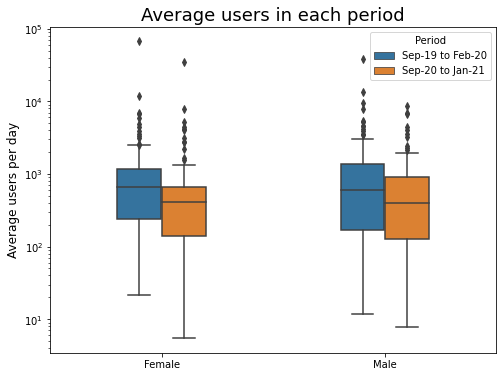

In [129]:
plt.figure(figsize=(8,6))
g = sns.boxplot(x='GenderDescription', y = 'Average_BusUsers_per_Day', hue = 'Period', data = churn_users, width=0.4, saturation=.7)
g.set_yscale('log')
plt.title('Average users in each period', fontsize=18)
plt.ylabel('Average users per day', fontsize=12)
plt.xlabel('')
plt.show()

Overall, there is not a big difference between the two periods.

#### Which age group takes public transport the most?

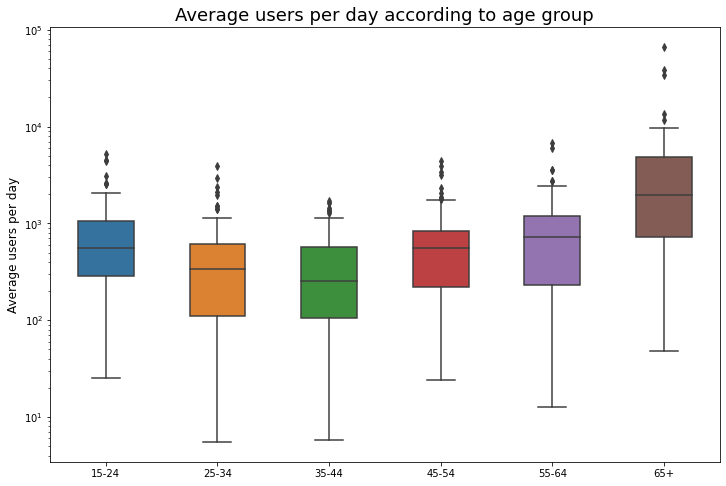

In [130]:
plt.figure(figsize=(12,8))
g = sns.boxplot(x='AgeClassDescription', y = 'Average_BusUsers_per_Day', data = churn_users, width=0.5, saturation=.7)
g.set_yscale('log')
plt.title('Average users per day according to age group', fontsize=18)
plt.ylabel('Average users per day', fontsize=12)
plt.xlabel('')
plt.show()

Older people are the ones who use public transport the most, which is to be expected, as they no longer have the abillities to drive. Next, it is the youngest who use public transport the most, which is also expected as they are students, many of them still without a driving licence. 

#### Which county has more people using public transport?

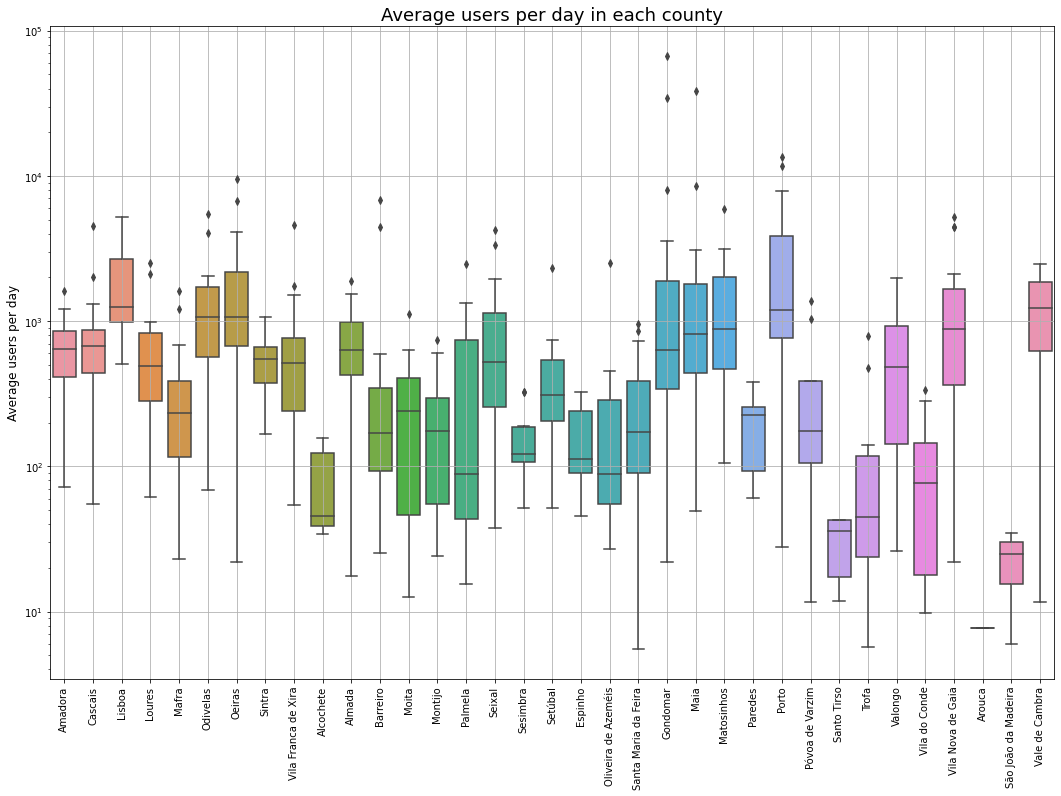

In [131]:
plt.figure(figsize=(18,12))
g = sns.boxplot(x='County_of_Origin', y = 'Average_BusUsers_per_Day', data = churn_users)
g.set_yscale('log')
g.xaxis.grid(True)
g.yaxis.grid(True)
plt.title('Average users per day in each county',  fontsize=18)
plt.ylabel('Average users per day', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

In [152]:
# seixal: 161; lisboa: 504; porto: 214; odivelas: 144; oeiras: 173; gondomar 174; maia: 135; matosinhos: 175; vale de cambra: 22; almada: 174; gaia: 186


Counties with more population have more bus users.

#### Calculate churn rate 
*churn rate* = A - B / A

where, A = *Average of users per day in first period* and B = *Average of users per day in second period* 

In [153]:
cols = ['Region_of_Origin', 'District_of_Origin', 'County_of_Origin', 'GenderDescription', 'AgeClassDescription']
Sep_19toFeb_20 = churn_users[churn_users['Period'] == 'Sep-19 to Feb-20']
Sep_20toJan_21 = churn_users[churn_users['Period'] == 'Sep-20 to Jan-21']
merged_churn_users = Sep_19toFeb_20.merge(Sep_20toJan_21, on=cols, how='right', suffixes=['_pre','_pos']).eval('churn_rate=(Average_BusUsers_per_Day_pre - Average_BusUsers_per_Day_pos) / Average_BusUsers_per_Day_pre')
# print(merged_churn_users.head())
hide_toggle()

In [133]:
merged_churn_users.churn_rate.describe()

count    239.000000
mean      -0.354075
std        3.832913
min      -42.274250
25%        0.126526
50%        0.363686
75%        0.549700
max        0.964131
Name: churn_rate, dtype: float64

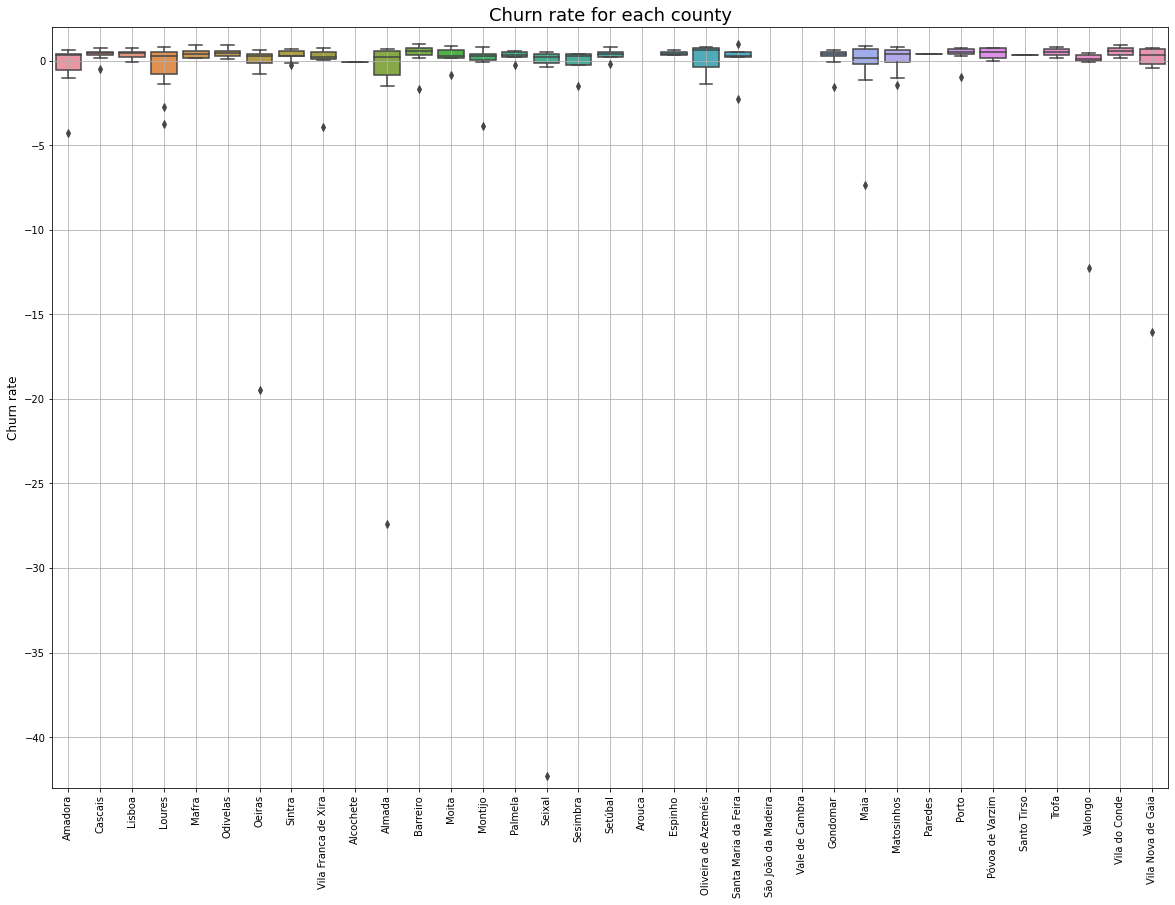

In [154]:
plt.figure(figsize=(20,14))
g = sns.boxplot(x='County_of_Origin', y = 'churn_rate', data = merged_churn_users)
g.set_ylim(-43, 2)
g.xaxis.grid(True)
g.yaxis.grid(True)
plt.title('Churn rate for each county',  fontsize=18)
plt.ylabel('Churn rate', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

Three counties that do not show churn rate values are new counties that had no public transport users in the first period.

#### Analyse the cases that churned

In [135]:
churned = merged_churn_users[merged_churn_users['churn_rate'] > 0]

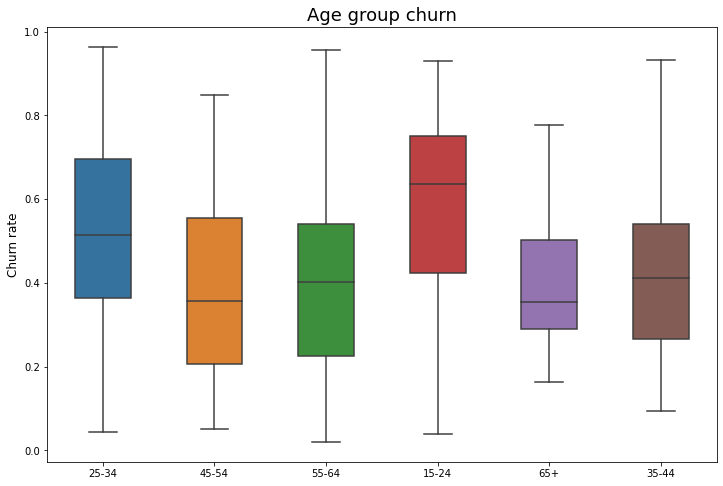

In [136]:
plt.figure(figsize=(12,8))
g = sns.boxplot(x='AgeClassDescription', y = 'churn_rate', data = churned, width=.5, saturation=.7)
plt.title('Age group churn', fontsize=18)
plt.ylabel('Churn rate', fontsize=12)
plt.xlabel('')
#plt.xticks(rotation=90)
plt.show()

The age group 15 to 24 are the ones that gave more churn because one measure to fight the pandemic was the closing of schools and universities. Another measure implemented by the government was remote work, which in general is more performed by the 25-34 age group.

#### Analyse cases that completely churned

In [137]:
# not churn
not_churn = merged_churn_users[(merged_churn_users['churn_rate'] < 0)]
comp_churned = merged_churn_users[~merged_churn_users['County_of_Origin'].isin(not_churn['County_of_Origin'])]
hide_toggle()

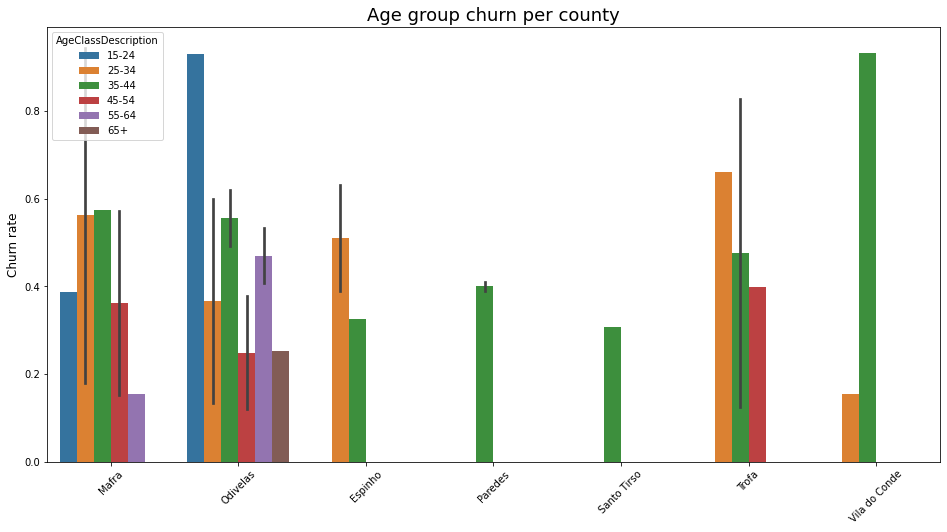

In [138]:
comp_churned = comp_churned[(comp_churned['County_of_Origin'] != 'Arouca') & (comp_churned['County_of_Origin'] != 'São João da Madeira') & (comp_churned['County_of_Origin'] != 'Vale de Cambra')]
plt.figure(figsize=(16,8))
g = sns.barplot(x="County_of_Origin", y="churn_rate", hue="AgeClassDescription", data=comp_churned, saturation=.7)
plt.title('Age group churn per county', fontsize=18)
plt.ylabel('Churn rate', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

Mafra and Odivelas were the counties that lost users from almost all age groups.

In [151]:
churn_OD = pd.read_csv('Stage1/Churn_OD.txt', sep='|', encoding='latin1')
# print(churn_OD.head())
hide_toggle()

#### Add parish to the code

In [140]:
parish = pd.read_csv('Stage1/ANACOM.csv', sep=';',)
hide_toggle()

In [141]:
parish[parish.columns[0]] = parish[parish.columns[0]].astype(np.int)

<ipython-input-141-237ce2de4e90>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  parish[parish.columns[0]] = parish[parish.columns[0]].astype(np.int)


In [142]:
churn_OD = pd.merge(churn_OD, parish, left_on=['County_of_Public_Transportation', 'Dicofre_ParishCode_of_Public_Transportation'], right_on = [parish.columns[2], parish.columns[0]], how = 'left')

In [143]:
del churn_OD[churn_OD.columns[8]]
del churn_OD[churn_OD.columns[9]]

#### ODIVELAS

In [144]:
odivelas_OD = churn_OD[churn_OD['County_of_Origin']=='Odivelas']
# porto_OD = porto_OD.groupby('County_of_Public_Transportation').size().reset_index(name='Count')
odivelas_OD = odivelas_OD[odivelas_OD['Demand_weight'] > 0.0001]

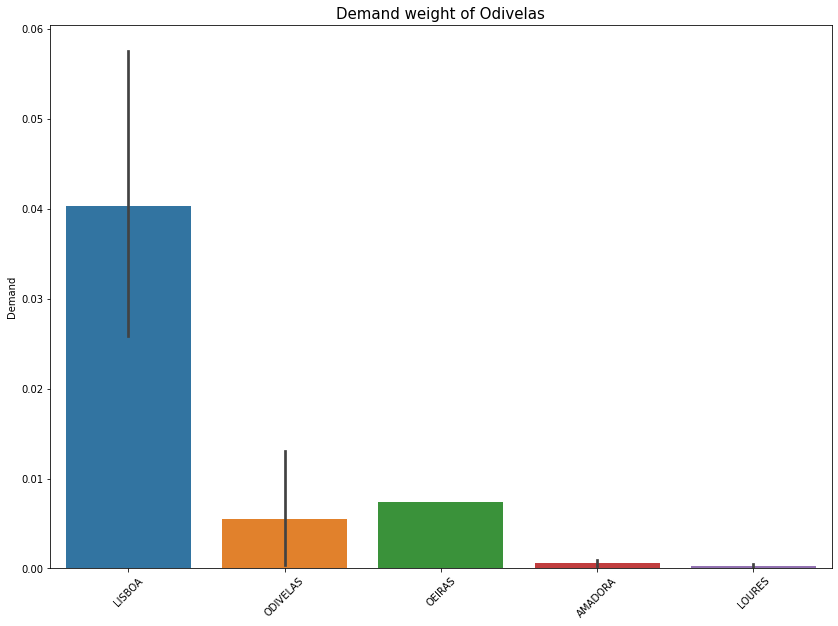

In [145]:
plt.figure(figsize=(14,10))
g = sns.barplot(x='County_of_Public_Transportation', y = 'Demand_weight', data = odivelas_OD)
plt.title('Demand weight of Odivelas', fontsize=15)
plt.ylabel('Demand', fontsize=10)
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

There is a great demand from Odivelas to Lisboa.

In [156]:
'''
odivelas_lisb = odivelas_OD[odivelas_OD['County_of_Public_Transportation'] == 'LISBOA']
plt.figure(figsize=(14,10))
g = sns.barplot(x='FREGUESIA', y = 'Demand_weight', data = odivelas_lisb)
plt.title('Demand weight of each parish of Lisboa', fontsize=15)
plt.ylabel('Demand', fontsize=10)
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()
'''
hide_toggle()

### Solution

- Alcohol gel at the vehicle entrance.
- Increase the value of the parking meters in the areas with less demand.
- The increased value of the parking meters can be used for investment in new routes and more vehicles.
- Promotional campaigns for events (e.g. buy a ticket for the "Queima das Fitas", the user get a free round trip, as long as the event is in the municipality of residence).
                                

### Impact
- In the current pandemic state, safety is an essecial factor, and transportation companies need to have measures in place to make users feel safe while traveling.
- Increasing the values of the parking meters will result in a decrease in parking lots and consequently an increase in new bus users.
- The new routes and lines will make users more satisfied, and could be a potential factor in acquiring new users.
- It promotes events in the county.

## Conclusions

### Scalability and Impact
Our solution is simple to implement and does not require much effort. Moreover, it can be applicable to any county.
Regarding the alcool gel, despite hand sanitization and buses, people may still feel unsafe due to crowding. 

### Future Work

If we had more data, the ideal would be a longer period, and with more granularity to understand the trend.
Also more characterization of the profiles, for example, social classes, type of job, education, among others, which would help to better understand the needs of users.
The bus routes would also help in the resolution, because in order to build new routes it is necessary to know the existing ones. 
